# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
dataset = pd.read_csv("/content/glass.csv")

In [3]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
list(dataset.columns)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [5]:
print(dataset['Type'].unique())

[1 2 3 5 6 7]


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


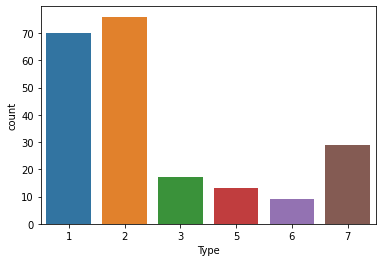

In [7]:
sns.countplot(dataset['Type'])

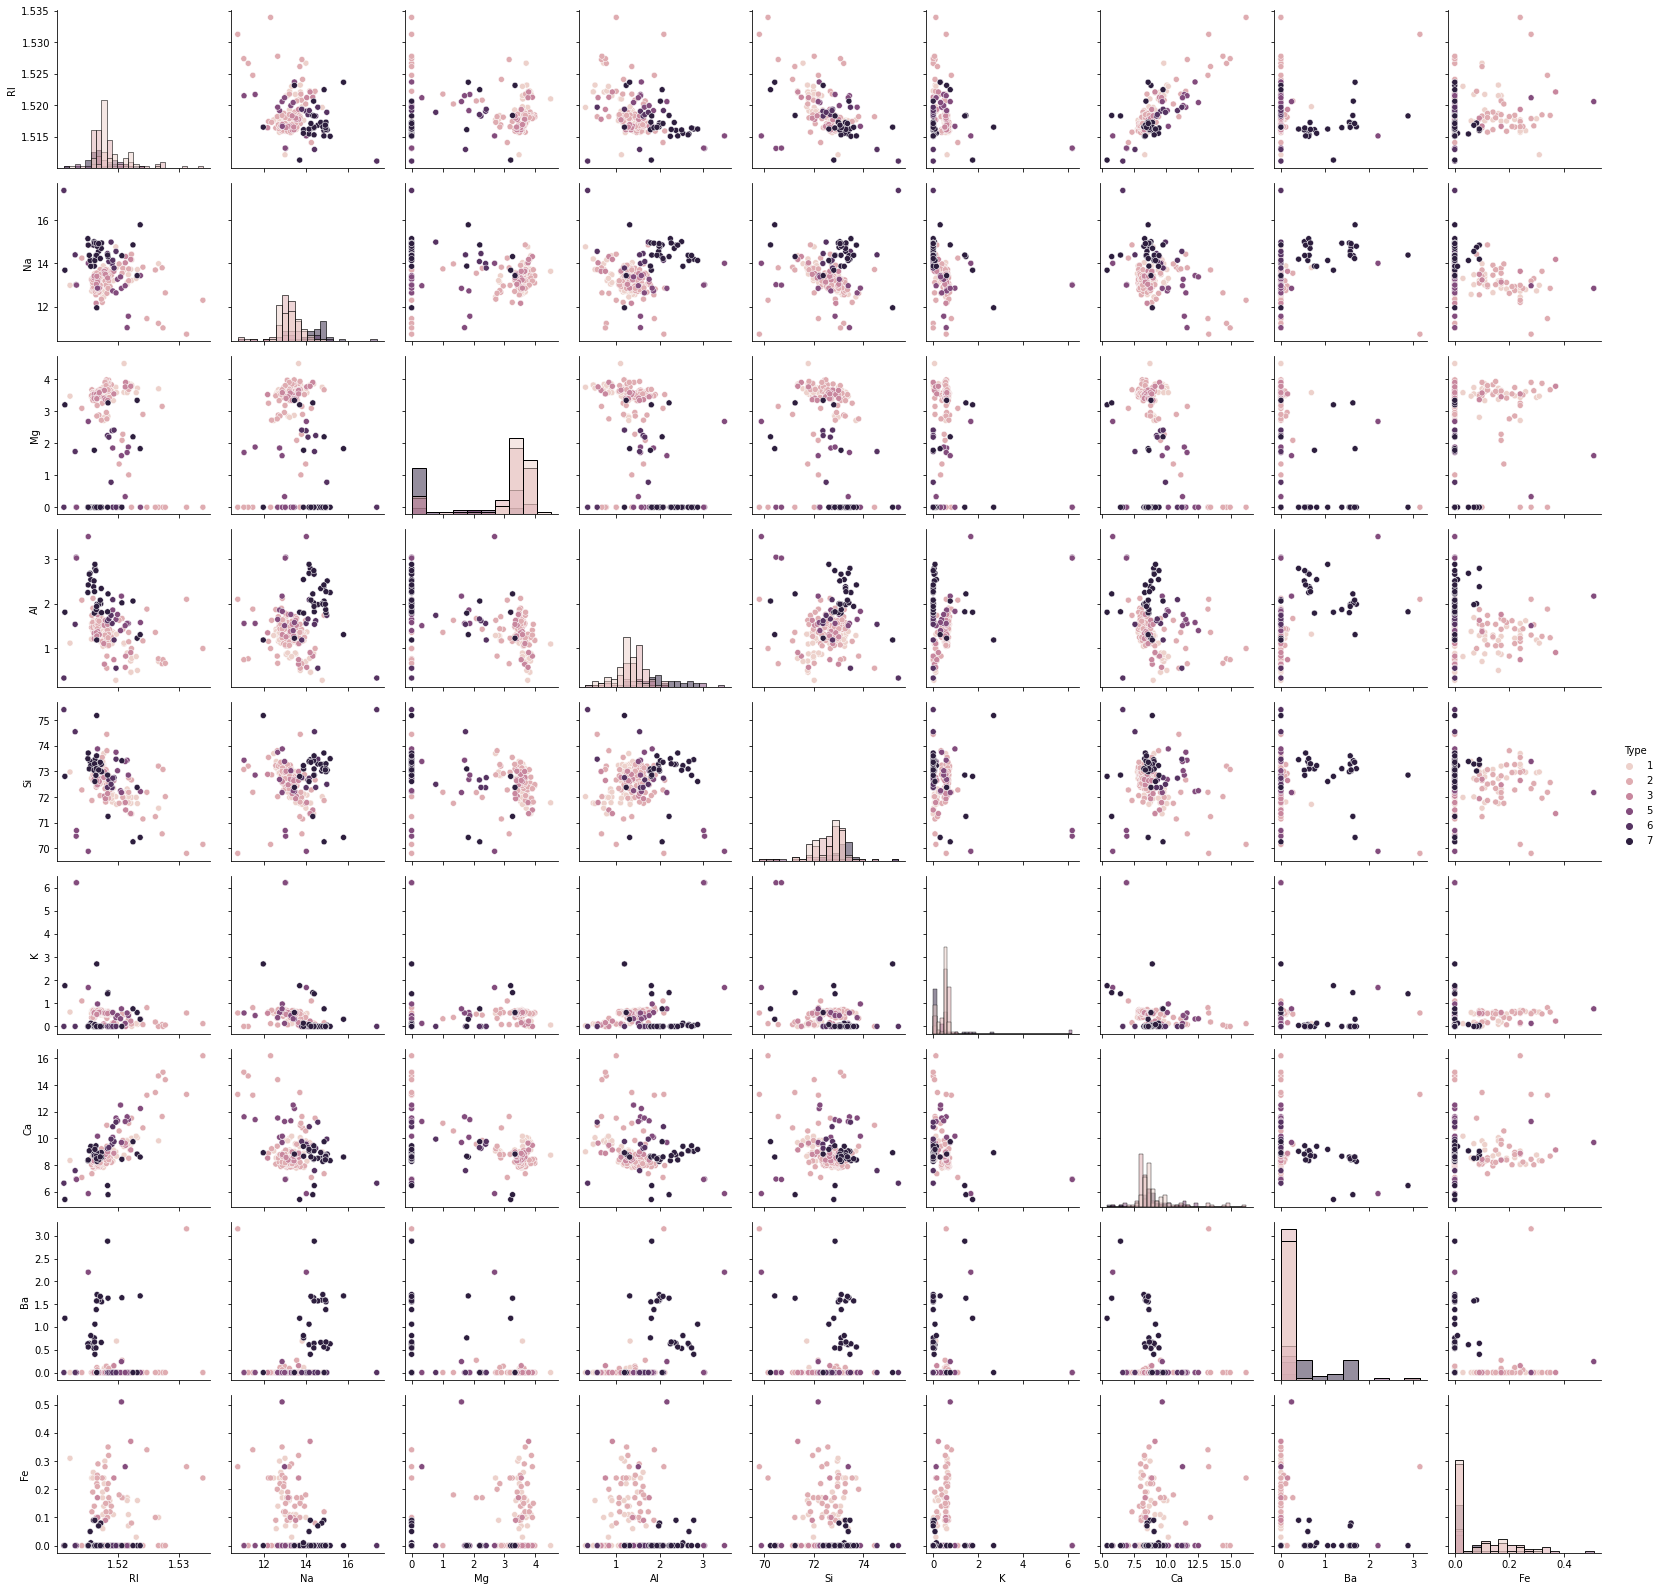

In [8]:
g = sns.PairGrid(dataset, hue="Type")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Independent and Dependent Variables

In [9]:
X = dataset.iloc[:,:9].values
y = dataset.iloc[:, -1].values

In [10]:
dataset.iloc[:,:9]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [11]:
dataset.iloc[:, -1]

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# Splitting the Dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
X_train

array([[ 1.51674, 12.79   ,  3.52   , ...,  7.9    ,  0.     ,  0.     ],
       [ 1.51808, 13.43   ,  2.87   , ...,  9.03   ,  0.     ,  0.     ],
       [ 1.52152, 13.05   ,  3.65   , ...,  9.85   ,  0.     ,  0.17   ],
       ...,
       [ 1.51708, 13.72   ,  3.68   , ...,  7.88   ,  0.     ,  0.     ],
       [ 1.52667, 13.99   ,  3.7    , ...,  9.82   ,  0.     ,  0.1    ],
       [ 1.51321, 13.     ,  0.     , ...,  6.93   ,  0.     ,  0.     ]])

In [14]:
y_train

array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2,
       1, 7, 1, 2, 6, 3, 2, 7, 3, 2, 2, 1, 1, 2, 7, 1, 1, 3, 7, 7, 2, 1,
       1, 1, 2, 7, 1, 1, 2, 2, 7, 7, 7, 3, 2, 1, 2, 2, 5, 7, 1, 2, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 7, 1, 2, 2, 2, 5, 7, 1, 1, 2, 2, 7, 5,
       6, 6, 5, 2, 6, 1, 2, 2, 1, 1, 1, 1, 2, 5, 1, 2, 2, 7, 1, 1, 2, 1,
       7, 2, 1, 1, 2, 5, 3, 1, 6, 2, 7, 1, 5, 2, 6, 3, 1, 6, 2, 2, 5, 2,
       2, 3, 7, 2, 2, 1, 5, 2, 7, 5, 7, 1, 7, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5])

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [16]:
X_test

array([[-2.64486958e-01,  1.72900675e+00, -1.89916963e+00,
         1.98423337e+00,  7.02265592e-01, -1.82347731e+00,
         3.67974623e-02,  8.94255449e-01, -6.83637668e-01],
       [-3.27389976e-02, -6.98023415e-01,  5.13892958e-01,
        -2.96994931e-01,  2.92432784e-01,  6.85255805e-01,
        -1.76950346e-01, -3.34397758e-01, -6.83637668e-01],
       [-5.52516566e-01, -9.33296747e-01,  5.13892958e-01,
         9.01225996e-01,  6.38229216e-01,  6.46056850e-01,
        -6.51945477e-01, -3.34397758e-01,  9.44604741e-02],
       [ 3.24814999e-01,  8.62210263e-01, -2.41922622e-01,
         1.86901982e-01, -4.63196454e-01, -1.82347731e+00,
         5.27625764e-01, -3.34397758e-01, -6.83637668e-01],
       [ 1.86097291e+00,  1.68773073e-01, -1.89916963e+00,
         2.32987402e-01, -6.55305583e-01, -5.69110753e-01,
         2.64135409e+00, -3.34397758e-01, -6.83637668e-01],
       [-7.18050824e-01, -3.51304820e-01,  5.83233837e-01,
         7.16884315e-02,  4.97349188e-01,  8.812505

# MACHINE LEARNING ALGORITHM

## K Nearest Neighbors MODEL

Finding best K_value

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
acc=[]
k_range=list(range(1,100))
for i in k_range:

  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy')

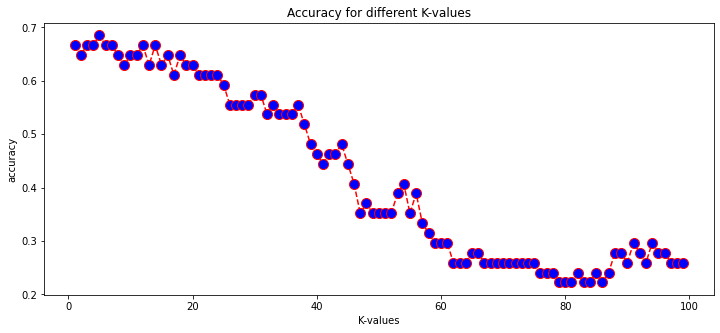

In [18]:
plt.figure(figsize=(12,5))
plt.plot(range(1,100),acc,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Accuracy for different K-values')
plt.xlabel('K-values')
plt.ylabel('accuracy')

comment:
From the plot, it is clear that when the value of K is between 0 to 20,the accuracy is high and after its get decreasing,and the when the value of k is 5 its more than other . 

Fitting best k-vlaue in the model

In [19]:
knn2 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn2.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
#Predict my test results
y_pred = knn2.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[14  0  0  0  0  0]
 [ 9 15  0  0  0  0]
 [ 4  1  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  1]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67        14
           2       0.88      0.62      0.73        24
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       0.86      0.86      0.86         7

    accuracy                           0.69        54
   macro avg       0.71      0.58      0.60        54
weighted avg       0.71      0.69      0.66        54



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
knn2.score(X_train,y_train)

0.73125

In [23]:
knn2.score(X_test,y_test)

0.6851851851851852

### Model is 68.51% Accurate

##Hyperparameter tuning with random searchcv

In [24]:
from sklearn.model_selection import RandomizedSearchCV
k=np.random.randint(1,50,60)
parameter={'n_neighbors':k}
random_result=RandomizedSearchCV(knn2,parameter,n_iter=5,cv=10,verbose=3)
random_result.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ....................n_neighbors=4;, score=0.688 total time=   0.0s
[CV 2/10] END ....................n_neighbors=4;, score=0.688 total time=   0.0s
[CV 3/10] END ....................n_neighbors=4;, score=0.625 total time=   0.0s
[CV 4/10] END ....................n_neighbors=4;, score=0.375 total time=   0.0s
[CV 5/10] END ....................n_neighbors=4;, score=0.875 total time=   0.0s
[CV 6/10] END ....................n_neighbors=4;, score=0.625 total time=   0.0s
[CV 7/10] END ....................n_neighbors=4;, score=0.688 total time=   0.0s
[CV 8/10] END ....................n_neighbors=4;, score=0.562 total time=   0.0s
[CV 9/10] END ....................n_neighbors=4;, score=0.812 total time=   0.0s
[CV 10/10] END ...................n_neighbors=4;, score=0.688 total time=   0.0s
[CV 1/10] END ...................n_neighbors=49;, score=0.312 total time=   0.0s
[CV 2/10] END ...................n_neighbors=49;

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': array([14, 42, 28, 26, 10, 36, 42, 39, 45, 30, 27, 44, 26, 12,  6, 36, 26,
        7,  6, 21,  8, 30, 36, 34, 14, 37, 36,  2, 41, 46, 47, 22, 46, 19,
        2,  4,  4, 22, 11, 11, 34,  7, 48, 48, 35, 16, 12, 28, 36, 17, 27,
       43, 30, 43, 37, 29, 49, 11, 38, 49])},
                   verbose=3)

In [31]:
random_result.best_params_

{'n_neighbors': 4}

In [25]:
random_result.score(X_train,y_train)

0.7375

In [26]:
random_result.score(X_test,y_test)

0.6666666666666666

In [28]:
from prettytable import PrettyTable
scoreTable =PrettyTable(['Model','train_score','test_score'])
scoreTable.add_row(['MOdel1','0.7312','0.6851'])
scoreTable.add_row(['validation','0.7375','0.6666'])
print(scoreTable)

+------------+-------------+------------+
|   Model    | train_score | test_score |
+------------+-------------+------------+
|   MOdel1   |    0.7312   |   0.6851   |
| validation |    0.7375   |   0.6666   |
+------------+-------------+------------+


As we observed from the table hypertuning not effect much on the accuracy and in model 1 the differece in the accuracy of the traing and testing very less so, it is more stable model.